In [1]:
# load data
import pandas as pd
import numpy as np
data = pd.read_csv('examdata.csv')
data.head()

,Exam1,Exam2,Pass
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


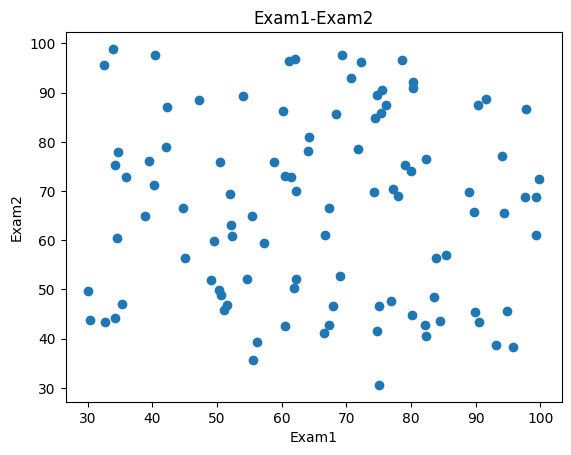

In [2]:
# visualize the data 
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(data.loc[:, 'Exam1'], data.loc[:, 'Exam2'])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.show()


In [3]:
mask = data.loc[:,'Pass'] == 1
print(mask)

0     False
1     False
2     False
3      True
4      True
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Pass, Length: 100, dtype: bool


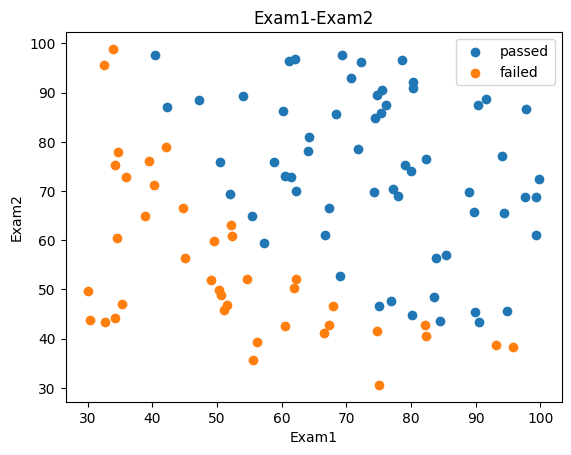

In [4]:
fig1 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [5]:
# define x, y
x = data.drop(['Pass'], axis=1)
y = data.loc[:, 'Pass']
x1 = data.loc[:, 'Exam1']
x2 = data.loc[:, 'Exam2']
x2.head()

0    78.024693
1    43.894998
2    72.902198
3    86.308552
4    75.344376
Name: Exam2, dtype: float64

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x,y)

LogisticRegression()

In [7]:
#show the redicted result and its accuracy
y_predict = lr.predict(x)
print(y_predict)

[0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


In [8]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.89


In [9]:
# exam1 = 70, exam2=65
y_test = lr.predict([[70,65]])
print('passed' if y_test == 1 else 'failed')

passed


C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [10]:
theta0 = lr.intercept_
theta1, theta2 = lr.coef_[0][0], lr.coef_[0][1]
print(theta0, theta1, theta2)

[-25.05219314] 0.20535491217790397 0.2005838039546906


In [11]:
x2_new = -(theta0+theta1*x1)/theta2
print(x2_new)

0     89.449169
1     93.889277
2     88.196312
3     63.282281
4     43.983773
        ...    
95    39.421346
96    81.629448
97    23.219064
98    68.240049
99    48.341870
Name: Exam1, Length: 100, dtype: float64


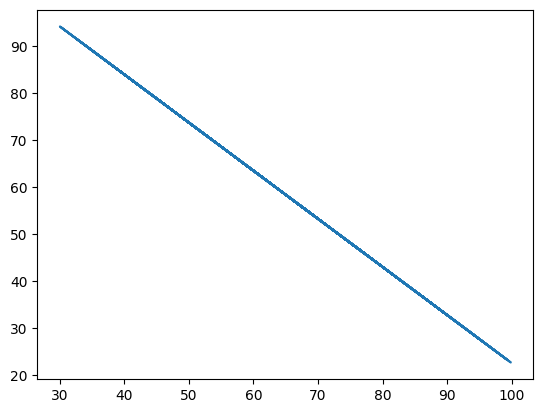

In [12]:
fig3 = plt.figure()
plt.plot(x1, x2_new)
plt.show()

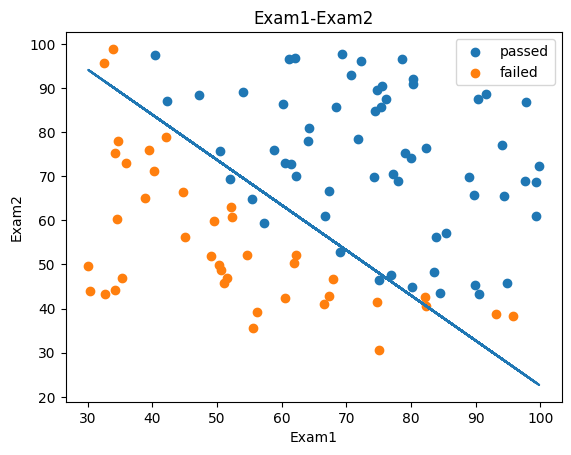

In [13]:
fig4 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1, x2_new)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()

In [14]:
x1_2 = x1 * x1
x2_2 = x2 * x2
x1_x2 = x1 * x2
print(x1, x1_2, x2_2, x1_x2)

0     34.623660
1     30.286711
2     35.847409
3     60.182599
4     79.032736
        ...    
95    83.489163
96    42.261701
97    99.315009
98    55.340018
99    74.775893
Name: Exam1, Length: 100, dtype: float64 0     1198.797805
1      917.284849
2     1285.036716
3     3621.945269
4     6246.173368
         ...     
95    6970.440295
96    1786.051355
97    9863.470975
98    3062.517544
99    5591.434174
Name: Exam1, Length: 100, dtype: float64 0     6087.852690
1     1926.770807
2     5314.730478
3     7449.166166
4     5676.775061
         ...     
95    2340.652054
96    7587.080849
97    4730.056948
98    4216.156574
99    8015.587398
Name: Exam2, Length: 100, dtype: float64 0     2701.500406
1     1329.435094
2     2613.354893
3     5194.273015
4     5954.672216
         ...     
95    4039.229555
96    3681.156888
97    6830.430397
98    3593.334590
99    6694.671710
Length: 100, dtype: float64


In [15]:
x_new = {'x1':x1, 'x2':x2, 'x1_2':x1_2, 'x2_2':x2_2, 'x1_x2':x1_x2}
x_new = pd.DataFrame(x_new)
print(x_new)

           x1         x2         x1_2         x2_2        x1_x2
0   34.623660  78.024693  1198.797805  6087.852690  2701.500406
1   30.286711  43.894998   917.284849  1926.770807  1329.435094
2   35.847409  72.902198  1285.036716  5314.730478  2613.354893
3   60.182599  86.308552  3621.945269  7449.166166  5194.273015
4   79.032736  75.344376  6246.173368  5676.775061  5954.672216
..        ...        ...          ...          ...          ...
95  83.489163  48.380286  6970.440295  2340.652054  4039.229555
96  42.261701  87.103851  1786.051355  7587.080849  3681.156888
97  99.315009  68.775409  9863.470975  4730.056948  6830.430397
98  55.340018  64.931938  3062.517544  4216.156574  3593.334590
99  74.775893  89.529813  5591.434174  8015.587398  6694.671710

[100 rows x 5 columns]


In [16]:
# new model and train
lr2 = LogisticRegression()
lr2.fit(x_new, y)

C:\Users\WindW\anaconda3\envs\ai_basic\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
y2_predict = lr2.predict(x_new)
accuracy2 = accuracy_score(y, y2_predict);
print(accuracy2)

1.0


In [18]:
x1_new = x1.sort_values()
print(x1_new)

63    30.058822
1     30.286711
57    32.577200
70    32.722833
36    33.915500
        ...    
56    97.645634
47    97.771599
51    99.272527
97    99.315009
75    99.827858
Name: Exam1, Length: 100, dtype: float64


In [19]:
theta0 = lr2.intercept_
theta1,theta2,theta3,theta4,theta5 = lr2.coef_[0][0],lr2.coef_[0][1],lr2.coef_[0][2],lr2.coef_[0][3],lr2.coef_[0][4]
print(theta0,theta1,theta2,theta3,theta4,theta5)

[-15.67759182] -0.734923566534513 -1.38475597149413 -0.0015744009297642618 0.0035093706758328146 0.039654681840265577


In [20]:
a = theta4
b = theta5 * x1_new + theta2
c = theta0 + theta1 * x1_new + theta3 * x1_new * x1_new
x2_new_boundary = (-b + np.sqrt(b*b - 4*a*c))/(2*a)
print(x2_new_boundary)

63    136.654671
1     135.297616
57    122.513183
70    121.752850
36    115.759652
         ...    
56     39.038620
47     39.015602
51     38.748866
97     38.741514
75     38.653592
Name: Exam1, Length: 100, dtype: float64


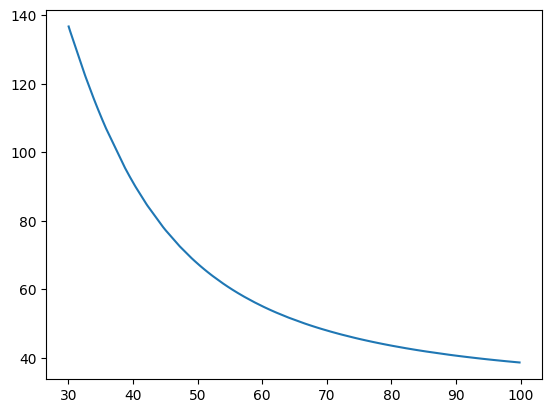

In [21]:
fig4 = plt.figure()
plt.plot(x1_new, x2_new_boundary)
plt.show()

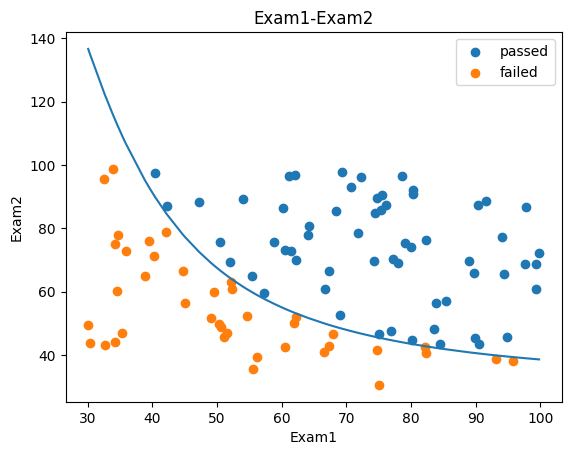

In [22]:
fig4 = plt.figure()
passed = plt.scatter(data.loc[:, 'Exam1'][mask], data.loc[:, 'Exam2'][mask])
failed = plt.scatter(data.loc[:, 'Exam1'][~mask], data.loc[:, 'Exam2'][~mask])
plt.plot(x1_new, x2_new_boundary)
plt.title('Exam1-Exam2')
plt.xlabel('Exam1')
plt.ylabel('Exam2')
plt.legend((passed, failed), ('passed', 'failed'))
plt.show()